# Thinking statistically & fun with hacker statistics
This notebook is adapted from a short course done in [DataCamp](https://www.datacamp.com/courses/statistical-thinking-in-python-part-2). It'll serve as a reference point

1. [Experimenting with Poisson distribution](#t1.0)
    * [1.1 Trying different parameter values](#t1.1)
2. [Generating Bootstrap](#t2.0)
    * [2.1 Bootstrap Confidence Interval](#t2.1)
3. [Formulating Hypothesis](#t3.0)
    * [3.1 Test Statistics](#t3.1)
    * [3.2 Bootstrap Hypothesis Test](#t3.2)
    * [3.3 A two-sample bootstrap hypothesis test for difference of means](#t3.3)
4. [A/B Testing](#t4.0)
    * [4.1 Pearson Correlation](#t4.1)
5. [Putting everything together - Final Case Study](#t5.0)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

<a id="t1.0"></a>
## Experimenting with Poisson distribution
**How often do we get no-hitters?**
The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call τ, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ you found and plot the histogram as an approximation to the PDF.

In [2]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
                        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
                        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
                        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
                        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
                       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
                         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
                        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
                       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
                        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
                        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
                        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
                        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
                        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
                        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
                       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
                        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
                        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
                       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
                       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
                       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
                        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
                        876,  381,  905,  156,  419,  239,  119,  129,  467])

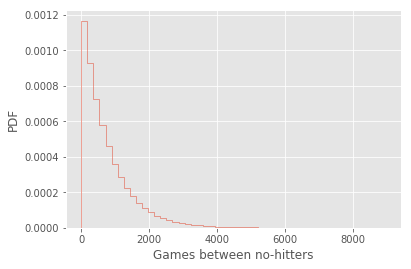

In [3]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins = 50, normed = True, histtype = 'step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


**Do the data follow our story**<br>
You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

In [4]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

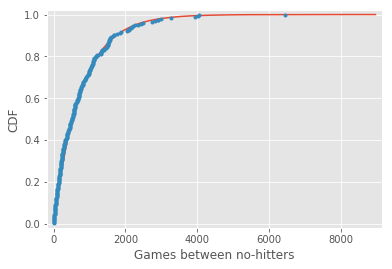

In [5]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()


<a id="t1.1"></a>
### 1.1 Trying different parameter values
**How is the parameter optimal**<br>

Now sample out of an exponential distribution with τ being twice as large as the optimal τ. Do it again for τ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the τ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

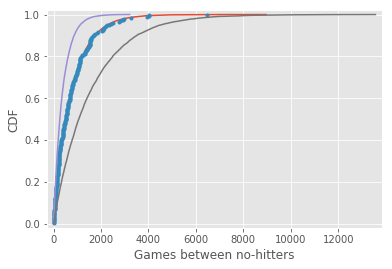

In [6]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, size = 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2, size = 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

<a id="t2.0"></a>
## 2.0 Generating Bootstrap

In [7]:
rainfall = np.array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
                    878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
                    752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
                    803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
                    835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
                    883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
                    927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
                    936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
                    771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
                    700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
                    736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
                    770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
                    960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
                    789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
                    667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
                    595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
                    572.4, 1146.4,  728.2,  864.2,  793. ])

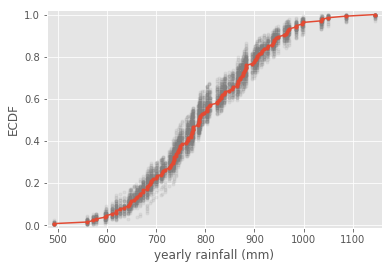

In [8]:
for i in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()


<a id="t2.1"></a>
### 2.1 Bootstrap Confidence Intervals

* If you repeated measurements over and over gain, p% of the observed values would lie within the p% confidence interval

In [9]:
# Generating many bootstrap replicates
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

10.510549150506188
10.358764199574097


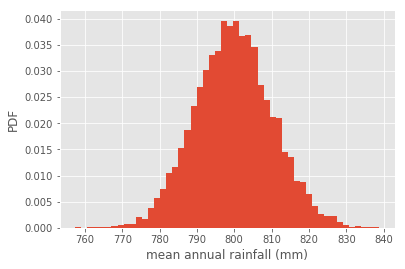

In [10]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

A confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function.

Use the bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as bs_replicates. What is the 95% confidence interval?

In [11]:
np.percentile(bs_replicates, 2.5)
np.percentile(bs_replicates, 97.5)

820.627932330827

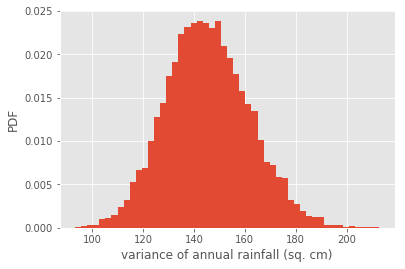

In [12]:
# Bootstrap replicates of other statistics

# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size = 10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins = 50, normed = True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


**Confidence Interval on the rate of no-hitters**

95% confidence interval = [663.65229084 869.79741036] games


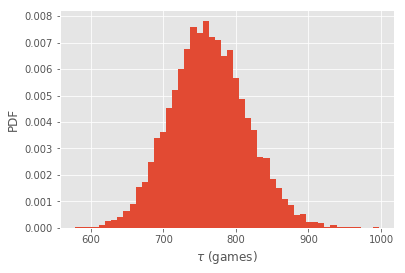

In [13]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times,np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


<a id="t3.0"></a>
### 3.0 Formulating a hypothesis
Permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test

In [14]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

Considering the monthly rainfall in July (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

In [15]:
rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])

rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
                            44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
                           112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
                           102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
                            57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
                           118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
                            59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
                           158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
                            67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
                            40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
                            28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
                           117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
                            73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
                           167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
                           161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])


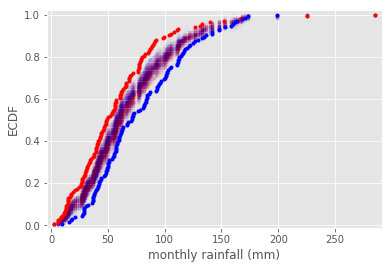

In [16]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Notice that the permutation samples ECDFs overlap and give a purple haze.None of the ECDFs from the permutation samples overlap with the *observed data*, suggesting that the hypothesis is not commensurate with the data. Hence, June and November rainfall are not identically distributed

<a id="t3.1"></a>
### 3.1 Test statistic
* A single number that can be computed from observed data and from data you simulate under the null hypothesis
* It serves as a basis of comparison between the two

**p-value**
* The probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true
* NOT the probability that the null hypothesis is true

statistical significance != practical significance

In [17]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. We will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data.

In [18]:
d = {'ID': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'],
      'impact_force': [1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453, 0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383, 0.457, 0.730, 0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.720, 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711, 0.614, 0.468]}
df = pd.DataFrame(data = d)

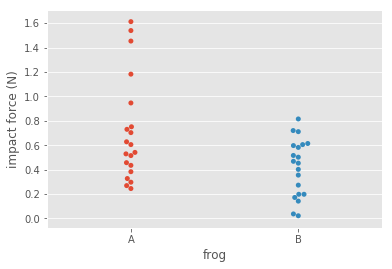

In [19]:
# Make bee swarm plot
_ = sns.swarmplot(x='ID',y='impact_force',data =df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

Eyeballing it, it does not look like they come from the same distribution. Frog A, the adult, has three or four very hard strikes, and Frog B, the juvenile, has a couple weak ones. However, it is possible that with only 20 samples it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

In [20]:
force_a = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])

force_b = np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
       0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
       0.614, 0.468])

In [21]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0058


The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant," but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!

**Bootstrap hypothesis tests**
* Clearly state the null hypothesis
* Define your test statistic
* Generate many sets of simulated data assuming the null hypothesis is true
* Compute the test statistic for each simulated data set
* The p-value is the fraction of your simulated data sets for which the test statistic is at least as extreme as for the real data

<a id="t3.2"></a>
### 3.2 A one-sample bootstrap hypothesis test
Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C come from the same distribution. You will therefore test another, less restrictive hypothesis: The mean strike force of Frog B is equal to that of Frog C.

To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog B. **This leaves other properties of Frog B's distribution, such as the variance, unchanged.**

In [22]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

p =  0.0065


The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

<a id="t3.3"></a>
### 3.3 A two-sample bootstrap hypothesis test for difference of means
We now want to test the hypothesis that Frog A and Frog B have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [23]:
forces_concat = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 , 0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502,
       0.273, 0.72 , 0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402,
       0.605, 0.711, 0.614, 0.468])

In [24]:
# compute the mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generated shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size = 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size = 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0048


<a id="t4.0"></a>
## 4.0 A/B Testing
Is your redesign effective?

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

In [25]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias. (I'm not really sold on this example)

In [26]:
# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, size = 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays nht_dead and nht_live, where "nht" is meant to stand for "no-hitter time."

In [27]:
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])

nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

In [28]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means,size = 10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates<=nht_diff_obs)/len(perm_replicates)
print('p-val =',p)


p-val = 0.0002


<a id="t4.1"></a>
### 4.1 Test of Correlation

In [29]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [30]:
illiteracy = np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
        6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
        3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])

fertility = np.array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928])

In [31]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

In [32]:
# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0


You will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

In [33]:
control = np.array([ 4.159234,  4.408002,  0.172812,  3.498278,  3.104912,  5.164174,
        6.615262,  4.633066,  0.170408,  2.65    ,  0.0875  ,  1.997148,
        6.92668 ,  4.574932,  3.896466,  5.209814,  3.70625 ,  0.      ,
        4.62545 ,  3.01444 ,  0.732652,  0.4     ,  6.518382,  5.225   ,
        6.218742,  6.840358,  1.211308,  0.368252,  3.59937 ,  4.212158,
        6.052364,  2.115532,  6.60413 ,  5.26074 ,  6.05695 ,  6.481172,
        3.171522,  3.057228,  0.218808,  5.215112,  4.465168,  2.28909 ,
        3.732572,  2.17087 ,  1.834326,  6.074862,  5.841978,  8.524892,
        4.698492,  2.965624,  2.324206,  3.409412,  4.830726,  0.1     ,
        0.      ,  4.101432,  3.478162,  1.009688,  4.999296,  4.32196 ,
        0.299592,  3.606032,  7.54026 ,  4.284024,  0.057494,  6.036668,
        2.924084,  4.150144,  1.256926,  4.666502,  4.806594,  2.52478 ,
        2.027654,  2.52283 ,  4.735598,  2.033236,  0.      ,  6.177294,
        2.601834,  3.544408,  3.6045  ,  5.520346,  4.80698 ,  3.002478,
        3.559816,  7.075844, 10.      ,  0.139772,  6.17171 ,  3.201232,
        8.459546,  0.17857 ,  7.088276,  5.496662,  5.415086,  1.932282,
        3.02838 ,  7.47996 ,  1.86259 ,  7.838498,  2.242718,  3.292958,
        6.363644,  4.386898,  8.47533 ,  4.156304,  1.463956,  4.533628,
        5.573922,  1.29454 ,  7.547504,  3.92466 ,  5.820258,  4.118522,
        4.125   ,  2.286698,  0.591882,  1.273124,  0.      ,  0.      ,
        0.      , 12.22502 ,  7.601604,  5.56798 ,  1.679914,  8.77096 ,
        5.823942,  0.258374,  0.      ,  5.899236,  5.486354,  2.053148,
        3.25541 ,  2.72564 ,  3.364066,  2.43427 ,  5.282548,  3.963666,
        0.24851 ,  0.347916,  4.046862,  5.461436,  4.066104,  0.      ,
        0.065   ])

treated = np.array([1.342686, 1.058476, 3.793784, 0.40428 , 4.528388, 2.142966,
       3.937742, 0.1375  , 6.919164, 0.      , 3.597812, 5.196538,
       2.78955 , 2.3229  , 1.090636, 5.323916, 1.021618, 0.931836,
       2.78    , 0.412202, 1.180934, 2.8674  , 0.      , 0.064354,
       3.008348, 0.876634, 0.      , 4.971712, 7.280658, 4.79732 ,
       2.084956, 3.251514, 1.9405  , 1.566192, 0.58894 , 5.219658,
       0.977976, 3.124584, 1.297564, 1.433328, 4.24337 , 0.880964,
       2.376566, 3.763658, 1.918426, 3.74    , 3.841726, 4.69964 ,
       4.386876, 0.      , 1.127432, 1.845452, 0.690314, 4.185602,
       2.284732, 7.237594, 2.185148, 2.799124, 3.43218 , 0.63354 ,
       1.142496, 0.586   , 2.372858, 1.80032 , 3.329306, 4.028804,
       3.474156, 7.508752, 2.032824, 1.336556, 1.906496, 1.396046,
       2.488104, 4.759114, 1.07853 , 3.19927 , 3.814252, 4.275962,
       2.817056, 0.552198, 3.27194 , 5.11525 , 2.064628, 0.      ,
       3.34101 , 6.177322, 0.      , 3.66415 , 2.352582, 1.531696])

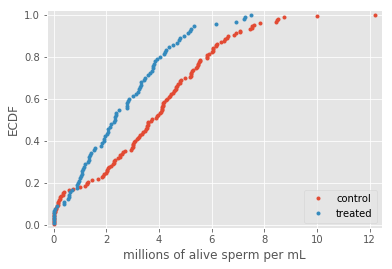

In [34]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

In [35]:
# Compute the difference in mean sperm count: diff_means
diff_means = diff_of_means(control, treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control- bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0


<a id="t5.0"></a>
### 5.0 Putting everything together - Final Case Study

In [42]:
bd_1975 = np.array([ 8.4 ,  8.8 ,  8.4 ,  8.  ,  7.9 ,  8.9 ,  8.6 ,  8.5 ,  8.9 ,
        9.1 ,  8.6 ,  9.8 ,  8.2 ,  9.  ,  9.7 ,  8.6 ,  8.2 ,  9.  ,
        8.4 ,  8.6 ,  8.9 ,  9.1 ,  8.3 ,  8.7 ,  9.6 ,  8.5 ,  9.1 ,
        9.  ,  9.2 ,  9.9 ,  8.6 ,  9.2 ,  8.4 ,  8.9 ,  8.5 , 10.4 ,
        9.6 ,  9.1 ,  9.3 ,  9.3 ,  8.8 ,  8.3 ,  8.8 ,  9.1 , 10.1 ,
        8.9 ,  9.2 ,  8.5 , 10.2 , 10.1 ,  9.2 ,  9.7 ,  9.1 ,  8.5 ,
        8.2 ,  9.  ,  9.3 ,  8.  ,  9.1 ,  8.1 ,  8.3 ,  8.7 ,  8.8 ,
        8.6 ,  8.7 ,  8.  ,  8.8 ,  9.  ,  9.1 ,  9.74,  9.1 ,  9.8 ,
       10.4 ,  8.3 ,  9.44,  9.04,  9.  ,  9.05,  9.65,  9.45,  8.65,
        9.45,  9.45,  9.05,  8.75,  9.45,  8.35])

bd_2012 = np.array([ 9.4 ,  8.9 ,  9.5 , 11.  ,  8.7 ,  8.4 ,  9.1 ,  8.7 , 10.2 ,
        9.6 ,  8.85,  8.8 ,  9.5 ,  9.2 ,  9.  ,  9.8 ,  9.3 ,  9.  ,
       10.2 ,  7.7 ,  9.  ,  9.5 ,  9.4 ,  8.  ,  8.9 ,  9.4 ,  9.5 ,
        8.  , 10.  ,  8.95,  8.2 ,  8.8 ,  9.2 ,  9.4 ,  9.5 ,  8.1 ,
        9.5 ,  8.4 ,  9.3 ,  9.3 ,  9.6 ,  9.2 , 10.  ,  8.9 , 10.5 ,
        8.9 ,  8.6 ,  8.8 ,  9.15,  9.5 ,  9.1 , 10.2 ,  8.4 , 10.  ,
       10.2 ,  9.3 , 10.8 ,  8.3 ,  7.8 ,  9.8 ,  7.9 ,  8.9 ,  7.7 ,
        8.9 ,  9.4 ,  9.4 ,  8.5 ,  8.5 ,  9.6 , 10.2 ,  8.8 ,  9.5 ,
        9.3 ,  9.  ,  9.2 ,  8.7 ,  9.  ,  9.1 ,  8.7 ,  9.4 ,  9.8 ,
        8.6 , 10.6 ,  9.  ,  9.5 ,  8.1 ,  9.3 ,  9.6 ,  8.5 ,  8.2 ,
        8.  ,  9.5 ,  9.7 ,  9.9 ,  9.1 ,  9.5 ,  9.8 ,  8.4 ,  8.3 ,
        9.6 ,  9.4 , 10.  ,  8.9 ,  9.1 ,  9.8 ,  9.3 ,  9.9 ,  8.9 ,
        8.5 , 10.6 ,  9.3 ,  8.9 ,  8.9 ,  9.7 ,  9.8 , 10.5 ,  8.4 ,
       10.  ,  9.  ,  8.7 ,  8.8 ,  8.4 ,  9.3 ,  9.8 ,  8.9 ,  9.8 ,
        9.1 ])

**ECDFs of beak depths**

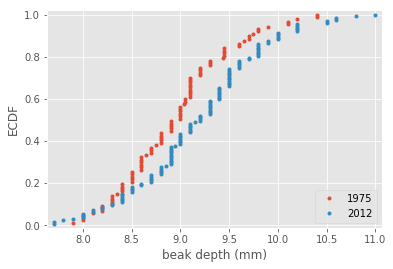

In [43]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
_=plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

**Parameter estimates of beak depths**
Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.

In [44]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, size = 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, size = 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5,97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06000758 0.39107616] mm


**Hypothesis test: Are beaks deeper in 2012?**<br>
Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [45]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value: p
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)


p = 0.0038


We get a p-value of 0.0034, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! In the previous exercise, you got a difference of 0.2 mm between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.